In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
def getDataSetX(item, start, to, size) :
    arr = []
    for i in range(start, to - (size-1)) :
        arr.append(item[i:i+size , 0])
    nparr = np.array(arr)
    nparr = np.reshape(nparr, (nparr.shape[0], nparr.shape[1], 1))
    return (nparr)

In [3]:
def getDataSetY(item, start, to, size) :
    arr = []
    for i in range(start + size, to + 1) :
        arr.append(item[i, 0])
    nparr = np.array(arr)
    return (nparr)

In [4]:
df = pd.read_csv("C:/Users/user8/Desktop/Temp_data.csv")
df = df.iloc[ :100000]
print(df.shape)

(100000, 7)


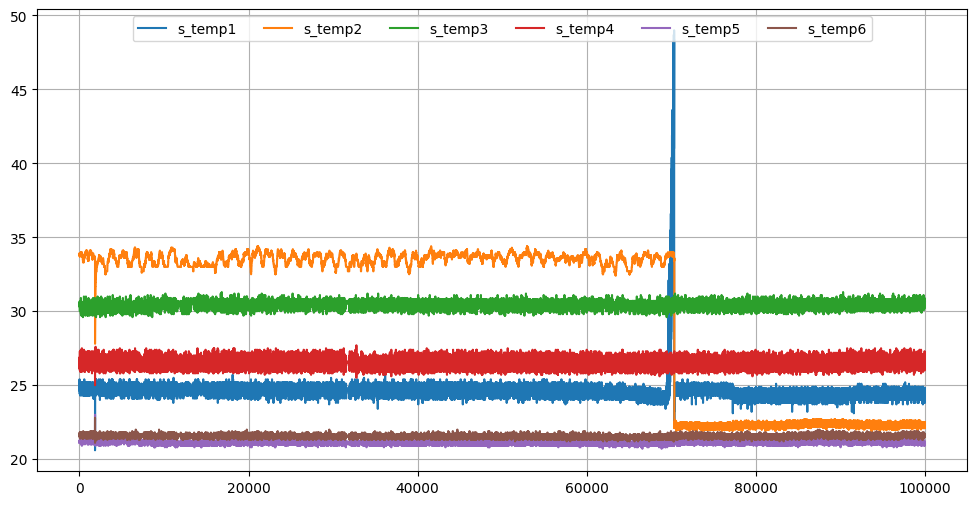

In [5]:
plt.figure(figsize=(12,6))

plt.plot(df['S_TEMP1'], label='s_temp1')
plt.plot(df['S_TEMP2'], label='s_temp2')
plt.plot(df['S_TEMP3'], label='s_temp3')
plt.plot(df['S_TEMP4'], label='s_temp4')
plt.plot(df['S_TEMP5'], label='s_temp5')
plt.plot(df['S_TEMP6'], label='s_temp6')
plt.legend(loc='upper center', ncol=6)
plt.grid()

plt.show()

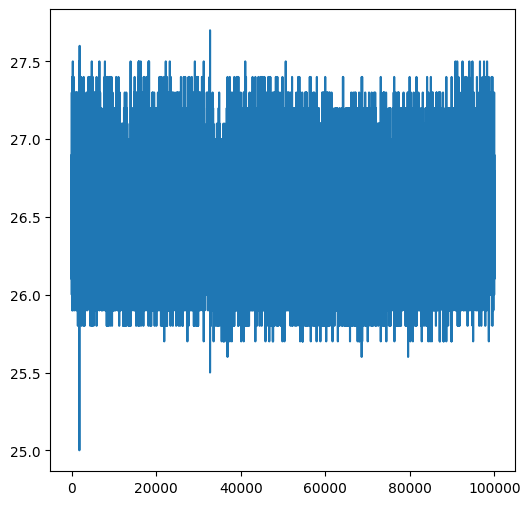

In [6]:
plt.figure(figsize=(6,6))
plt.plot(df['S_TEMP4'])
plt.show()

In [7]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['S_TIME', 'S_TEMP4'])

for i in range(0, len(data)) :
    
    new_data['S_TIME'][i] = data['S_TIME'][i]
    new_data['S_TEMP4'][i] = data['S_TEMP4'][i]
    
new_data.index = new_data.S_TIME
new_data.drop('S_TIME', axis=1, inplace=True)

final_data = new_data.values

train_idx = int(final_data.shape[0] * 0.8)

print(train_idx)
print(final_data.shape[0] - train_idx)

80000
20000


In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_data) 

In [9]:
x_train = getDataSetX(scaled_data, 0, train_idx-1, 10)
y_train = getDataSetY(scaled_data, 0, train_idx-1, 10)
x_test = getDataSetX(scaled_data, train_idx, final_data.shape[0]-1, 10)
y_test = getDataSetY(scaled_data, train_idx, final_data.shape[0]-1, 10)

In [10]:
lstm_model = Sequential([
    LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1],1)),
    LSTM(units=10),
    Dense(1)
])
lstm_model.compile(loss='mse', optimizer='adam')
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 10)            480       
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [11]:
history_lstm = lstm_model.fit(x_train, y_train, epochs=10, batch_size=32,
                             validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0071 - val_loss: 0.0050
Epoch 2/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 3/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 4/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 5/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 6/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 7/10
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 8/10
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 9/10
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 10/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.00

In [12]:
lstm_model.save('C:/Users/user8/Desktop/lstm_temp4.h5')

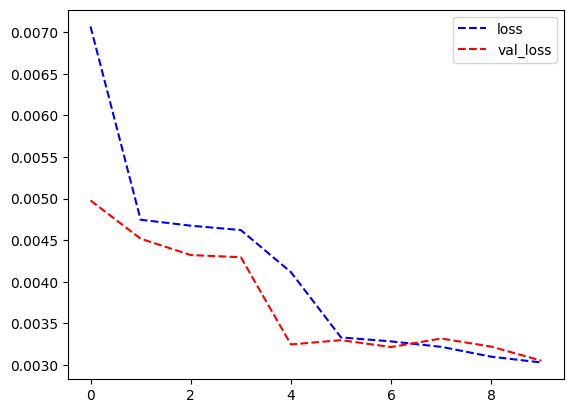

In [13]:
plt.plot(history_lstm.history['loss'], 'b--', label='loss')
plt.plot(history_lstm.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

In [15]:
pred_s_temp4 = lstm_model.predict(x_test)
pred_s_temp4 = scaler.inverse_transform(pred_s_temp4)

In [16]:
test_data = final_data[train_idx: , : ]
print(test_data[10:, 0])
print(pred_s_temp4[ : , 0])

# MAPE(Mean Absolute Percentage Error)
print(np.mean(np.abs((test_data[10:, 0] - pred_s_temp4[ : , 0]) / test_data[10:, 0]))*100)

[26.4 26.2 26.3 ... 26.6 26.7 26.5]
[26.365517 26.33124  26.27387  ... 26.456825 26.489248 26.449646]
0.42442719222367825


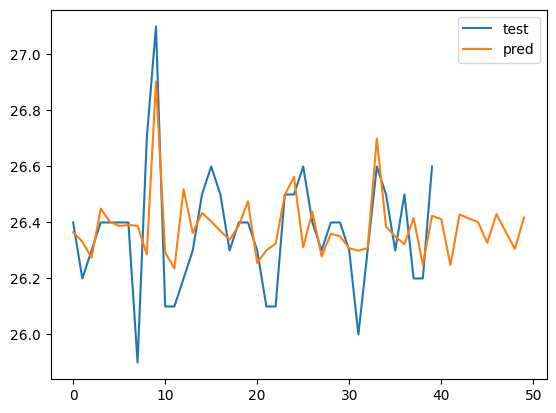

In [17]:
plt.plot(test_data[10:50, 0], label='test')
plt.plot(pred_s_temp4[:50], label='pred')
plt.legend()
plt.show()